In [96]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [97]:
#Datos
M=2.85#Kg
m=3.06#Kg

R=0.30#m
r=0.20#m
i=round((1/2)*m*(r**2),3)#kgm**2
I=round((1/2)*M*(R**2),2)#kgm**
datos1=pd.read_csv('Antes del choque.csv')
datos2=pd.read_csv('Despues del choque.csv')
print('Los datos son los siguientes:')
print('Masa disco grande(M)',M,'kg')
print('Masa disco pequeño(m)',m,'kg')
print('Radio disco grande(R)',R,'m')
print('Radio disco pequeño(r)',r,'m')
print('Momento de inercia disco grande(I)',I,'kgm**2')
print('Momento de inercia disco pequeño(i)',i,'Kgm**2')
print('------------------------------ ')
print('Datos antes del choque(Disco grande)')
print(datos1)
print('Datos antes del choque(Ambos discos)')
print('------------------------------ ')
print(datos2)





Los datos son los siguientes:
Masa disco grande(M) 2.85 kg
Masa disco pequeño(m) 3.06 kg
Radio disco grande(R) 0.3 m
Radio disco pequeño(r) 0.2 m
Momento de inercia disco grande(I) 0.13 kgm**2
Momento de inercia disco pequeño(i) 0.061 Kgm**2
------------------------------ 
Datos antes del choque(Disco grande)
       t(s)  Δθ(rad)
0  0.508333     1.57
1  0.508333     1.57
2  0.445833     1.57
3  0.762500     1.57
4  1.012500     1.57
5  0.666667     1.57
6  0.883333     1.57
Datos antes del choque(Ambos discos)
------------------------------ 
       t(s)  Δθ(rad)
0  0.750000     1.57
1  0.750000     1.57
2  0.629167     1.57
3  1.125000     1.57
4  1.537500     1.57
5  0.945833     1.57
6  1.254167     1.57


In [98]:
va=round(datos1['Δθ(rad)']/datos1['t(s)'],1)
vd=round(datos2['Δθ(rad)']/datos2['t(s)'],1)
print('Velocidad antes de los discos(Disco grande)(rad/S)')
print(' ')
print(va)
print('------------------------------ ')
print('Velocidad después de los discos(Ambos discos)(rad/s)')
print(' ')
print(vd)


Velocidad antes de los discos(Disco grande)(rad/S)
 
0    3.1
1    3.1
2    3.5
3    2.1
4    1.6
5    2.4
6    1.8
dtype: float64
------------------------------ 
Velocidad después de los discos(Ambos discos)(rad/s)
 
0    2.1
1    2.1
2    2.5
3    1.4
4    1.0
5    1.7
6    1.3
dtype: float64


No handles with labels found to put in legend.


        Hacemos una ajuste lineal para wf vs wi.
 
Hacemos una ajuste lineal.
 
El ajuste es wf(wi)=m*wi,tiene como parametros:
 
m=(0.69+-0.01)
 
Por ende m(adimensional)= 0.69
------------------------------ 


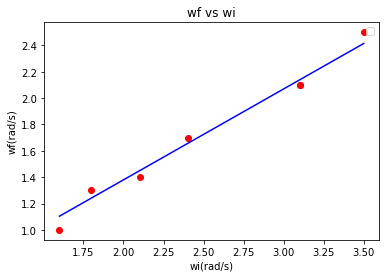

In [99]:
def func(x, m):
    return m*x

print('        Hacemos una ajuste lineal para wf vs wi.')
print(' ')
print('Hacemos una ajuste lineal.')
print(' ')
ajuste,covarianza= curve_fit(func,va.tolist(),vd.tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
Δm=round(desviacionestandar[0],3)
print('El ajuste es wf(wi)=m*wi,tiene como parametros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+')')
print(' ')
print('Por ende m(adimensional)=',m)
print('------------------------------ ')
fig, ax = plt.subplots() 
x1=min(va.tolist())
x2=max(va.tolist())
x=np.linspace(x1,x2,1000)
y1=func(x,m)
ax.scatter(va.tolist(),vd.tolist(),color='red')
ax.plot(x,y1,color='blue')  
ax.set_xlabel('wi(rad/s)')  
ax.set_ylabel('wf(rad/s)')  
ax.set_title('wf vs wi')
ax.legend()



In [100]:
Li=round(I*va,2)
Lf=round((I+i)*vd,2)
print('Momento angular antes(kgm**2/s)')
print(' ')
print(Li)
print('Momento angular después(kgm**2/s)')
print(' ')
print(Lf)


Momento angular antes(kgm**2/s)
 
0    0.40
1    0.40
2    0.46
3    0.27
4    0.21
5    0.31
6    0.23
dtype: float64
Momento angular después(kgm**2/s)
 
0    0.40
1    0.40
2    0.48
3    0.27
4    0.19
5    0.32
6    0.25
dtype: float64


No handles with labels found to put in legend.


        Hacemos una ajuste lineal para Lf vs Li.
 
Hacemos una ajuste lineal.
 
El ajuste es Lf(Li)=m*Li,tiene como parametros:
 
m=(1.0+-0.0)
 
Por ende m(adimensional)= 1.0
------------------------------ 


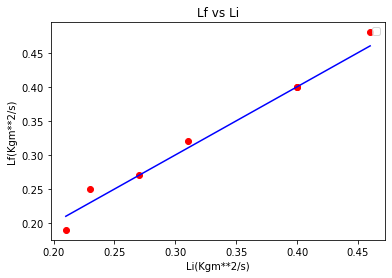

In [106]:
def func(x, m):
    return m*x

print('        Hacemos una ajuste lineal para Lf vs Li.')
print(' ')
print('Hacemos una ajuste lineal.')
print(' ')
ajuste,covarianza= curve_fit(func,Li.tolist(),Lf.tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],1)
Δm=round(desviacionestandar[0],1)
print('El ajuste es Lf(Li)=m*Li,tiene como parametros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+')')
print(' ')
print('Por ende m(adimensional)=',m)
print('------------------------------ ')
fig, ax = plt.subplots() 
x1=min(Li.tolist())
x2=max(Li.tolist())
x=np.linspace(x1,x2,1000)
y1=func(x,m)
ax.scatter(Li.tolist(),Lf.tolist(),color='red')
ax.plot(x,y1,color='blue')  
ax.set_xlabel('Li(Kgm**2/s)')  
ax.set_ylabel('Lf(Kgm**2/s)')  
ax.set_title('Lf vs Li')
ax.legend()

In [102]:
Ki=round((1/2)*I*(va**2),2)
Kf=round((1/2)*(I+i)*(vd**2),2)
print('Energía cinética antes(J)')
print(' ')
print(Ki)
print('Energía cinética después(J)')
print(' ')
print(Kf)


Energía cinética antes(J)
 
0    0.62
1    0.62
2    0.80
3    0.29
4    0.17
5    0.37
6    0.21
dtype: float64
Energía cinética después(J)
 
0    0.42
1    0.42
2    0.60
3    0.19
4    0.10
5    0.28
6    0.16
dtype: float64


No handles with labels found to put in legend.


        Hacemos una ajuste lineal para Kf vs Ki.
 
Hacemos una ajuste lineal.
 
El ajuste es Kf(Ki)=m*Ki,tiene como parametros:
 
m=(0.71+-0.02)
 
Por ende m(adimensional)= 0.71
------------------------------ 


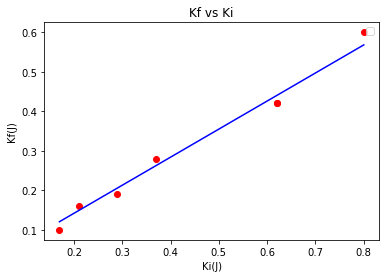

In [105]:
def func(x, m):
    return m*x

print('        Hacemos una ajuste lineal para Kf vs Ki.')
print(' ')
print('Hacemos una ajuste lineal.')
print(' ')
ajuste,covarianza= curve_fit(func,Ki.tolist(),Kf.tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
Δm=round(desviacionestandar[0],2)
print('El ajuste es Kf(Ki)=m*Ki,tiene como parametros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+')')
print(' ')
print('Por ende m(adimensional)=',m)
print('------------------------------ ')
fig, ax = plt.subplots() 
x1=min(Ki.tolist())
x2=max(Ki.tolist())
x=np.linspace(x1,x2,1000)
y1=func(x,m)
ax.scatter(Ki.tolist(),Kf.tolist(),color='red')
ax.plot(x,y1,color='blue')  
ax.set_xlabel('Ki(J)')  
ax.set_ylabel('Kf(J)')  
ax.set_title('Kf vs Ki')
ax.legend()